In [2]:
#Librerie utilizzate
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

In [3]:
csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
data = pd.read_csv(csv_path)

#Crea una copia del DataFrame
df=data.copy()

In [4]:
#Restituisce le prime righe del DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Verifica valori mancanti
totale =df.isnull().sum().sort_values(ascending = False)
percentuale = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([totale, percentuale], axis=1, keys=['Totale', 'Percentuale']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Totale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentuale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Filtraggio delle transazioni fraudolente e legittime
fraudolenti = df[df['Class'] == 1]
legittime = df[df['Class'] == 0]

# Calcolo del numero di transazioni fraudolente con importo nullo
conta_zero = fraudolenti[fraudolenti['Amount'] == 0].shape[0]
print(f"Il numero delle transazioni fraudolente con importo nullo (Amount=0) è: {conta_zero}")

# Calcolo del numero di transazioni legittime con importo nullo
conta_zero = legittime[legittime['Amount'] == 0].shape[0]
print(f"Il numero delle transazioni legittime con importo nullo (Amount=0) è: {conta_zero}")


Il numero delle transazioni fraudolente con importo nullo (Amount=0) è: 27
Il numero delle transazioni legittime con importo nullo (Amount=0) è: 1798


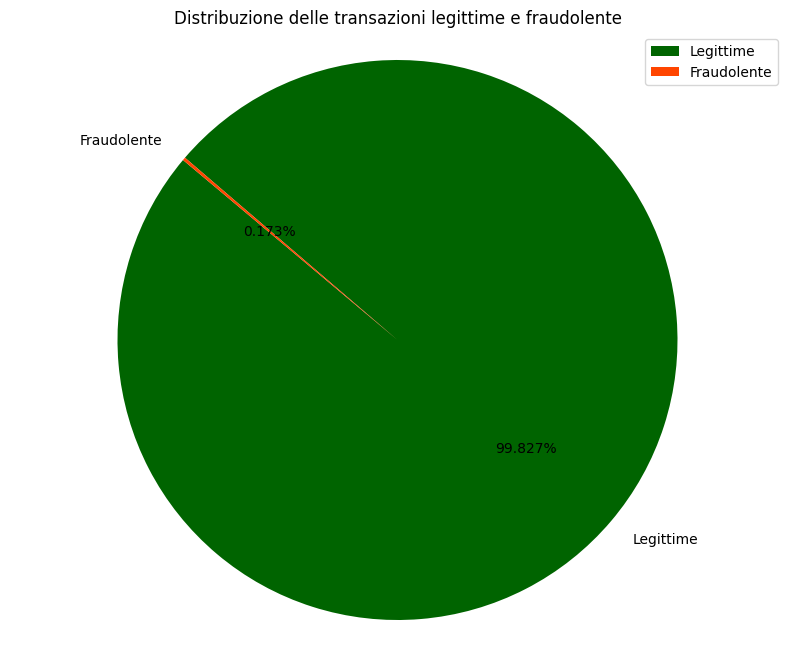

In [7]:
# Calcola il numero di transazioni normali e fraudolente
num_normal = df[df["Class"] == 0].shape[0]
num_fraud = df[df["Class"] == 1].shape[0]

# Etichette per le fette del grafico
labels = ['Legittime', 'Fraudolente']

# Dati da visualizzare nel grafico
sizes = [num_normal, num_fraud]

# Colori delle fette
colors = ['#006400', '#FF4500']

# Crea il grafico a torta con legenda e percentuali con tre cifre decimali
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.3f%%', startangle=140)
plt.title('Distribuzione delle transazioni legittime e fraudolente', loc='center')
plt.legend()
plt.axis('equal')  # Rende il grafico a torta circolare
plt.show()

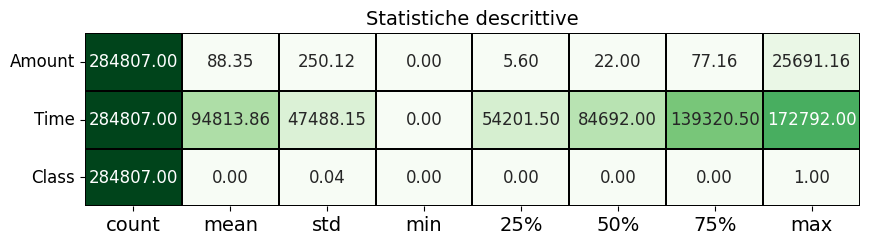

In [8]:
# Statistiche Descrittive del Dataset:
cols =df[["Amount","Time","Class"]]
cmap1 = 'Greens'
def desc_stats(dataframe):
    desc = dataframe.describe().T #restituisce le info del dataframe
    f,ax = plt.subplots(figsize=(10, desc.shape[0] * 0.75))

    #Creazione mappa per una diversa visualizzazione della descrizione DataFrame
    sns.heatmap(desc, annot = True, cmap = cmap1, fmt= '.2f', ax = ax, linecolor = 'black', linewidths = 1.3, cbar = False, annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,rotation = 0)
    plt.title("Statistiche descrittive", size = 14)
    plt.show()
desc_stats(cols)

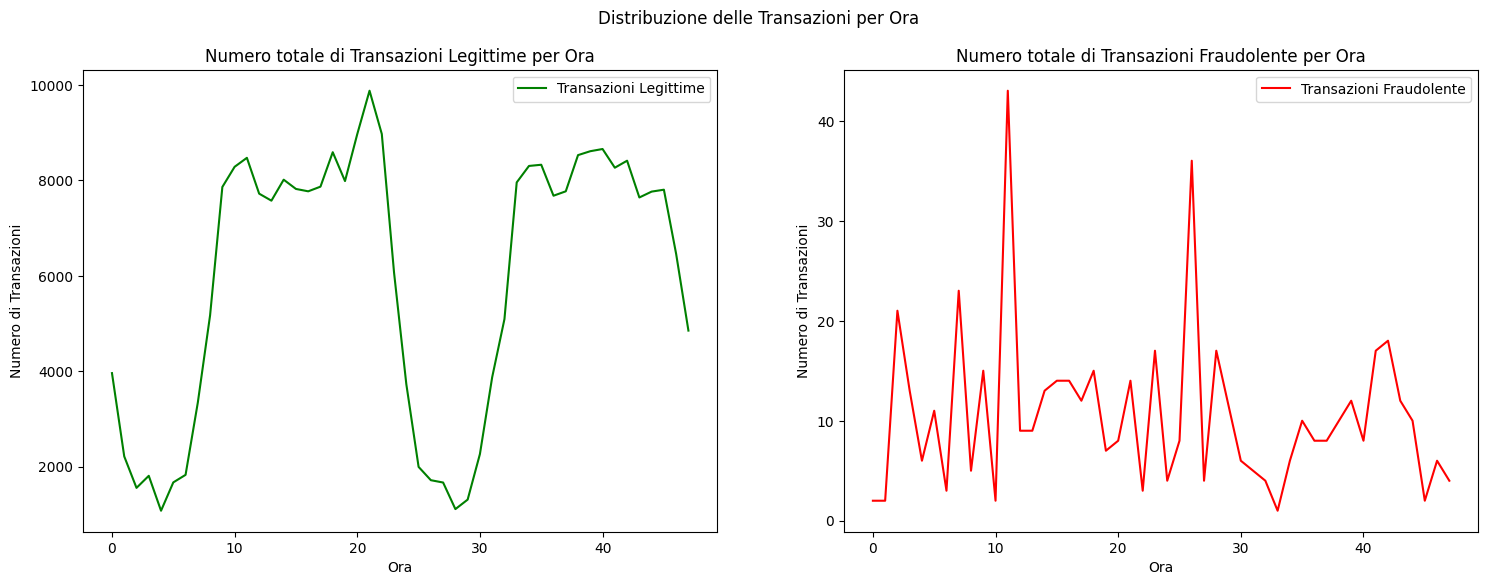

In [9]:
# Aggiunta del campo 'Hour' al DataFrame copiato
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

# Creazione di un nuovo DataFrame per l'analisi delle caratteristiche delle transazioni per ora
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count']).reset_index()
dfn = pd.DataFrame(tmp)
dfn.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions']

# Creazione dei grafici con legenda
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Creazione dei grafici
s = sns.lineplot(ax=ax1, x="Hour", y="Transactions", data=dfn.loc[dfn.Class == 0], color="green", label="Transazioni Legittime")
s = sns.lineplot(ax=ax2, x="Hour", y="Transactions", data=dfn.loc[dfn.Class == 1], color="red", label="Transazioni Fraudolente")

# Aggiunta delle legende ai grafici
ax1.legend()
ax2.legend()

# Impostazioni degli assi e dei titoli
ax1.set_xlabel("Ora")
ax1.set_ylabel("Numero di Transazioni")
ax1.set_title("Numero totale di Transazioni Legittime per Ora")
ax2.set_xlabel("Ora")
ax2.set_ylabel("Numero di Transazioni")
ax2.set_title("Numero totale di Transazioni Fraudolente per Ora")

# Titolo generale per entrambi i grafici
plt.suptitle("Distribuzione delle Transazioni per Ora")
plt.show()

In [10]:
#Restituisce le prime righe del nuovo dataframe utilizzato per la statistica
dfn.head()

,Hour,Class,Min,Max,Transactions
0,0.0,0,0.0,7712.43,3961
1,0.0,1,0.0,529.00,2
2,1.0,0,0.0,1769.69,2215
3,1.0,1,59.0,239.93,2
4,2.0,0,0.0,4002.88,1555


In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler
data=df.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.0


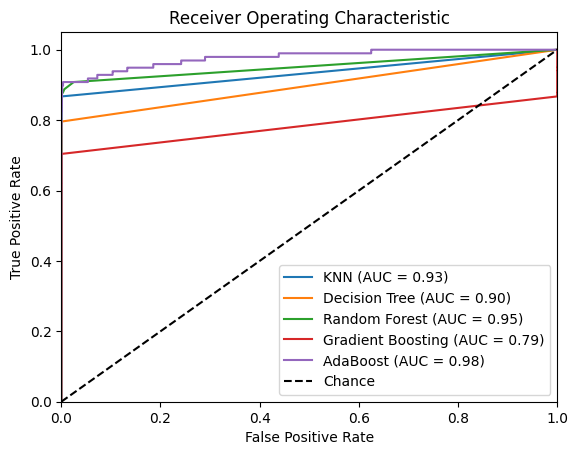

In [13]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
dataset = pd.read_csv(csv_path)

#Crea una copia del DataFrame
data=dataset.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Estrai le features (variabili indipendenti) dal dataframe escludendo la colonna "Class" e trasformale in un array
X = data.drop(["Class"], axis=1).values

# Estrai le etichette di classe dalla colonna "Class" del dataframe e trasformale in un array
y = data["Class"].values

# Suddividi i dati in training set e test set usando il metodo train_test_split
# X_train conterrà le features del training set, y_train conterrà le etichette di classe del training set
# X_test conterrà le features del test set, y_test conterrà le etichette di classe del test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

models = [knn, dtc, rfc, gbc, abc]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost']

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Calcola le metriche desiderate
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Crea una piccola tabella colorata con le metriche
    metrics_table = pd.DataFrame({
        'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza'],
        'Valore': [precision, recall, f1, accuracy]
    })
    
    # Colora le celle della tabella in base ai valori delle metriche
    metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
    
    # Visualizza la tabella
    display(metrics_table_styled)

    # Disegno della curva ROC per ogni modello
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')


# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    
# Dettagli del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Mostra il grafico
plt.show()

,Metrica,Valore
0,Precision,0.973333
1,Recall,0.839080
2,F1 Score,0.901235
3,Accuratezza,0.918782


,Metrica,Valore
0,Precision,0.905882
1,Recall,0.885057
2,F1 Score,0.895349
3,Accuratezza,0.908629


,Metrica,Valore
0,Precision,1.000000
1,Recall,0.839080
2,F1 Score,0.912500
3,Accuratezza,0.928934


,Metrica,Valore
0,Precision,1.000000
1,Recall,0.850575
2,F1 Score,0.919255
3,Accuratezza,0.934010


,Metrica,Valore
0,Precision,0.961039
1,Recall,0.850575
2,F1 Score,0.902439
3,Accuratezza,0.918782


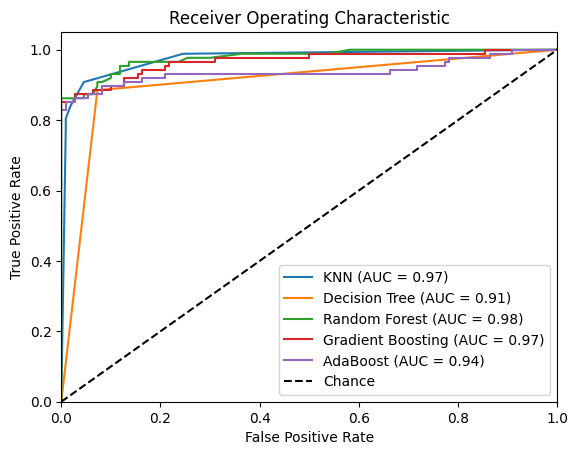

In [35]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
dataset = pd.read_csv(csv_path)

#Crea una copia del DataFrame
data=dataset.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Divide le transazioni in legittime e fraudolente
legitimate_transactions = data[data['Class'] == 0]
fraudulent_transactions = data[data['Class'] == 1]

# Sottocampiona il numero di transazioni legittime per farlo corrispondere al numero di transazioni fraudolente
legitimate_subsample = resample(legitimate_transactions, replace=False, n_samples=len(fraudulent_transactions), random_state=42)

# Combina le transazioni legittime sottocampionate con quelle fraudolente
balanced_subsample = pd.concat([legitimate_subsample, fraudulent_transactions])

# Mischia il sottocampionamento 
balanced_subsample = balanced_subsample.sample(frac=1, random_state=42)

# Divide le features (X) dalla variabile target (y)
X = balanced_subsample.drop('Class', axis=1)  # Features
y = balanced_subsample['Class']  # Target

# Suddividi i dati in training set e test set usando il metodo train_test_split
# X_train conterrà le features del training set, y_train conterrà le etichette di classe del training set
# X_test conterrà le features del test set, y_test conterrà le etichette di classe del test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_array = X_test.values  #

knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

models = [knn, dtc, rfc, gbc, abc]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost']

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test_array)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Calcola le metriche desiderate
    y_pred = model.predict(X_test_array)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Crea una piccola tabella colorata con le metriche
    metrics_table = pd.DataFrame({
        'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza'],
        'Valore': [precision, recall, f1, accuracy]
    })
    
    # Colora le celle della tabella in base ai valori delle metriche
    metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
    
    # Visualizza la tabella
    display(metrics_table_styled)
    
    # Disegno della curva ROC per ogni modello
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    
# Dettagli del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Mostra il grafico
plt.show()

KNN - Cross-Validation AUC: nan


,Metrica,Valore
0,Precision,0.973333
1,Recall,0.839080
2,F1 Score,0.901235
3,Accuratezza,0.918782


Decision Tree - Cross-Validation AUC: 0.92


,Metrica,Valore
0,Precision,0.927711
1,Recall,0.885057
2,F1 Score,0.905882
3,Accuratezza,0.918782


Random Forest - Cross-Validation AUC: 0.98


,Metrica,Valore
0,Precision,0.986842
1,Recall,0.862069
2,F1 Score,0.920245
3,Accuratezza,0.934010


Gradient Boosting - Cross-Validation AUC: 0.98


,Metrica,Valore
0,Precision,1.000000
1,Recall,0.850575
2,F1 Score,0.919255
3,Accuratezza,0.934010


AdaBoost - Cross-Validation AUC: 0.97


,Metrica,Valore
0,Precision,0.961039
1,Recall,0.850575
2,F1 Score,0.902439
3,Accuratezza,0.918782


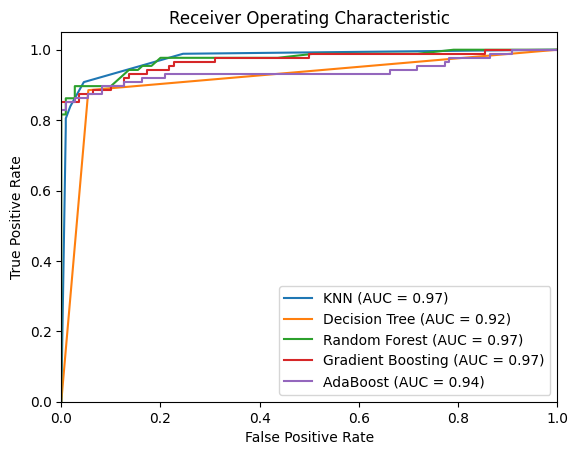

In [38]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
dataset = pd.read_csv(csv_path)

#Crea una copia del DataFrame
data=dataset.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

models = [knn, dtc, rfc, gbc, abc]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost']

for i, model in enumerate(models):
    # Calcola la cross-validation score per il modello corrente
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

    # Stampa la media della cross-validation score
    print(f'{model_names[i]} - Cross-Validation AUC: {cv_scores.mean():.2f}')

    X_test_array = X_test.values  # Converte il DataFrame in un array NumPy

    # Ora puoi procedere con il disegno delle curve ROC per ogni modello, come hai già fatto nel tuo codice
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test_array)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Calcola le metriche desiderate
    y_pred = model.predict(X_test_array)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Crea una piccola tabella colorata con le metriche
    metrics_table = pd.DataFrame({
        'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza'],
        'Valore': [precision, recall, f1, accuracy]
    })
    
    # Colora le celle della tabella in base ai valori delle metriche
    metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
    
    # Visualizza la tabella
    display(metrics_table_styled)

    # Disegno della curva ROC per ogni modello
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Dettagli del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Mostra il grafico
plt.show()

,Metrica,Valore
0,Precision,0.064993
1,Recall,0.897959
2,F1 Score,0.121212
3,Accuratezza,0.977599


,Metrica,Valore
0,Precision,0.015066
1,Recall,0.928571
2,F1 Score,0.029651
3,Accuratezza,0.895437


,Metrica,Valore
0,Precision,0.067823
1,Recall,0.877551
2,F1 Score,0.125915
3,Accuratezza,0.979038


,Metrica,Valore
0,Precision,0.044862
1,Recall,0.877551
2,F1 Score,0.085360
3,Accuratezza,0.967645


,Metrica,Valore
0,Precision,0.035200
1,Recall,0.897959
2,F1 Score,0.067744
3,Accuratezza,0.957480


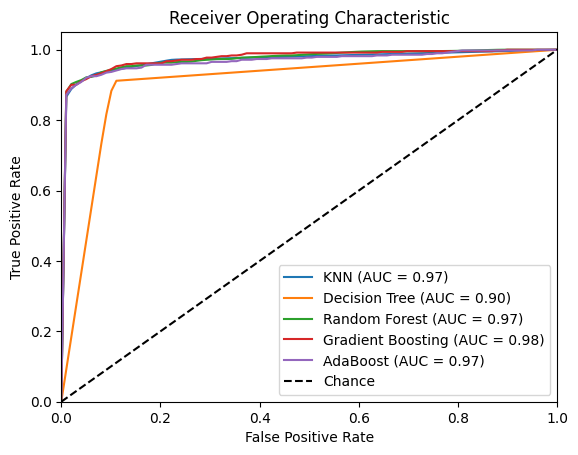

In [31]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

# Carica i dati
csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
dataset = pd.read_csv(csv_path)

# Crea una copia del DataFrame
data = dataset.copy()

# Dato che la maggior parte dei nostri dati è già stata scalata, dovremmo scalare le colonne che sono rimaste da scalare (Importo e Tempo)
rob_scaler = RobustScaler()

# Creazione di nuove colonne con i dati scalati di Importo e Tempo
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Rimozione delle colonne originali di Importo e Tempo
data.drop(['Time','Amount'], axis=1, inplace=True)

# Conserva le colonne scalate 'scaled_amount' e 'scaled_time' in nuove variabili
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

# Rimuovi le colonne 'scaled_amount' e 'scaled_time' dal dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Inserisci nuovamente le colonne scalate 'scaled_amount' e 'scaled_time' come prime due colonne nel dataframe
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Estrai le features (variabili indipendenti) dal dataframe escludendo la colonna "Class" e trasformale in un array
X = data.drop(["Class"], axis=1).values

# Estrai le etichette di classe dalla colonna "Class" del dataframe e trasformale in un array
y = data["Class"].values

# Inizializza i modelli
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()

models = [knn, dtc, rfc, gbc, abc]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost']

# Definisci il numero di fold per la cross-validation
n_splits = 5

# Crea un oggetto StratifiedKFold per la cross-validation
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Calcola e plotta le curve ROC per ogni modello utilizzando la cross-validation
for i, model in enumerate(models):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Sottocampionamento
        legitimate_indices = np.where(y_train == 0)[0]
        fraudulent_indices = np.where(y_train == 1)[0]
        random_indices = np.random.choice(legitimate_indices, len(fraudulent_indices), replace=False)
        under_sample_indices = np.concatenate([fraudulent_indices, random_indices])
        X_train_under = X_train[under_sample_indices]
        y_train_under = y_train[under_sample_indices]
        
        model.fit(X_train_under, y_train_under)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    
    # Calcola la media delle curve ROC e delle AUC per i fold
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)

    # Calcola le metriche desiderate
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Crea una piccola tabella colorata con le metriche
    metrics_table = pd.DataFrame({
        'Metrica': ['Precision', 'Recall', 'F1 Score', 'Accuratezza'],
        'Valore': [precision, recall, f1, accuracy]
    })
    
    # Colora le celle della tabella in base ai valori delle metriche
    metrics_table_styled = metrics_table.style.background_gradient(cmap='YlGnBu', subset=['Valore'])
    
    # Visualizza la tabella
    display(metrics_table_styled)
    
    # Disegno della curva ROC per ogni modello
    plt.plot(mean_fpr, mean_tpr, label=f'{model_names[i]} (AUC = {mean_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    
# Dettagli del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Mostra il grafico
plt.show()